#### Exploratory Data Analysis

In [1]:
import os

# To get the current working directory
cwd = os.getcwd()

# To get the parent of CWD
parent_dir = os.path.dirname(cwd)

#Path to data set
cleaned_data_path = os.path.join(parent_dir,"dataCleaning","processed_data.csv")
print("Path to cleaned data is :",cleaned_data_path)

Path to cleaned data is : c:\Users\nikhi\ba_dataScience\dataCleaning\processed_data.csv


In [2]:
#importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

from wordcloud import WordCloud,STOPWORDS

In [3]:
df = pd.read_csv(cleaned_data_path,index_col=0)
df = df.reset_index(drop=True)

In [4]:
df.head()

,Reviews,Stars,Date,Country,Verified,Cleaned_reviews
0,Have no fear when your BA flight is operated...,5.0,2024-02-21,United Kingdom,True,fear ba flight operated finnair business class...
1,We have flown BA five times from western USA...,10.0,2024-02-17,United States,False,flown ba five time western usa england always ...
2,London Heathrow to Istanbul at the start of ...,3.0,2024-02-17,United Kingdom,True,london heathrow istanbul start halfterm school...
3,"Jan 30th, I booked a last-minute, transatlant...",3.0,2024-02-16,United States,False,jan 30th booked lastminute transatlantic fligh...
4,I am a British Airways Gold Guest List member...,2.0,2024-02-11,United States,True,british airway gold guest list member lifetime...


#### What is the average overall rating given for British Airways?

In [5]:
df.Stars.mean()

4.628040057224607

#### What is the total count for each rating?

Text(0.5, 0.98, 'Frequency count for Each Rating')

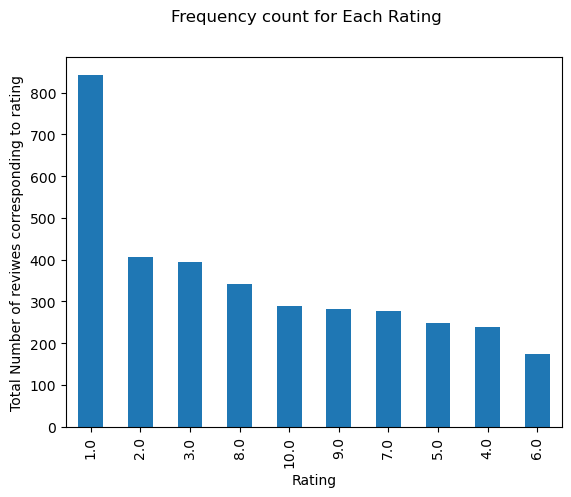

In [6]:
df.Stars.value_counts().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Total Number of reviwes corresponding to rating")
plt.suptitle("Frequency count for Each Rating")

In [7]:
# Get the value counts of the 'stars' column
star_counts = df['Stars'].value_counts().sort_index()

# Create a new DataFrame with unique star values and their counts
df_ratings = pd.DataFrame({'Stars': star_counts.index, 'Count': star_counts.values})
pct_values = (df_ratings.Stars.values/ df_ratings.Stars.values.sum()*100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [8]:
df_ratings = df_ratings.reset_index()

In [9]:
df_ratings.head()

,index,Stars,Count,pct_values
0,0,1.0,843,1.82
1,1,2.0,406,3.64
2,2,3.0,395,5.45
3,3,4.0,239,7.27
4,4,5.0,249,9.09


In [10]:
df_ratings.drop(columns=['index'],inplace=True)
df_ratings.head()


,Stars,Count,pct_values
0,1.0,843,1.82
1,2.0,406,3.64
2,3.0,395,5.45
3,4.0,239,7.27
4,5.0,249,9.09


In [11]:
df_ratings

,Stars,Count,pct_values
0,1.0,843,1.82
1,2.0,406,3.64
2,3.0,395,5.45
3,4.0,239,7.27
4,5.0,249,9.09
5,6.0,175,10.91
6,7.0,277,12.73
7,8.0,342,14.55
8,9.0,281,16.36
9,10.0,288,18.18


c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Counts for each ratings')

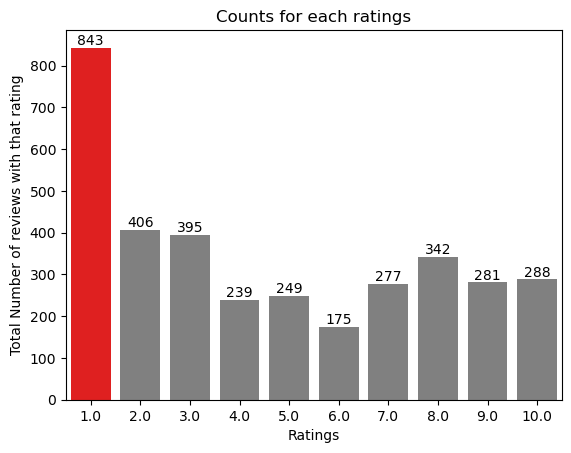

In [12]:
clrs = ['Red' if (x ==  max(df_ratings.Count)) else 'grey' for x in df_ratings.Count ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.Count, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [13]:
# Number of unique countries BA recieved reviews from
print(f'{len(df.Country.unique())} Unique Countries')

70 Unique Countries


#### Which country most reviews comes from?

In [14]:
df_country_review = pd.DataFrame(df.Country.value_counts().head()).reset_index()

In [15]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

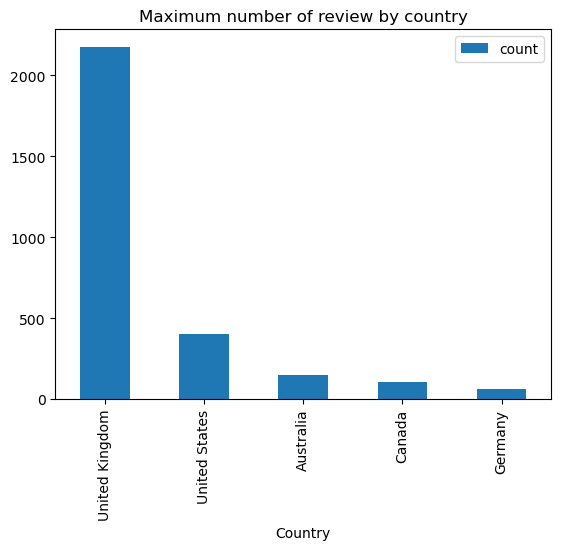

In [16]:
df_country_review.plot(kind="bar", x='Country')
plt.title("Maximum number of review by country")

#### Which Country provides on average highest ratings?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviews          3495 non-null   object 
 1   Stars            3495 non-null   float64
 2   Date             3495 non-null   object 
 3   Country          3495 non-null   object 
 4   Verified         3495 non-null   bool   
 5   Cleaned_reviews  3495 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 140.1+ KB


In [18]:
df_country_rating = pd.DataFrame(df.groupby('Country')['Stars'].mean().sort_values(ascending=False)).reset_index()


In [19]:
df_country_rating.rename(columns={'Stars':'avg_rating'}, inplace=True)


c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

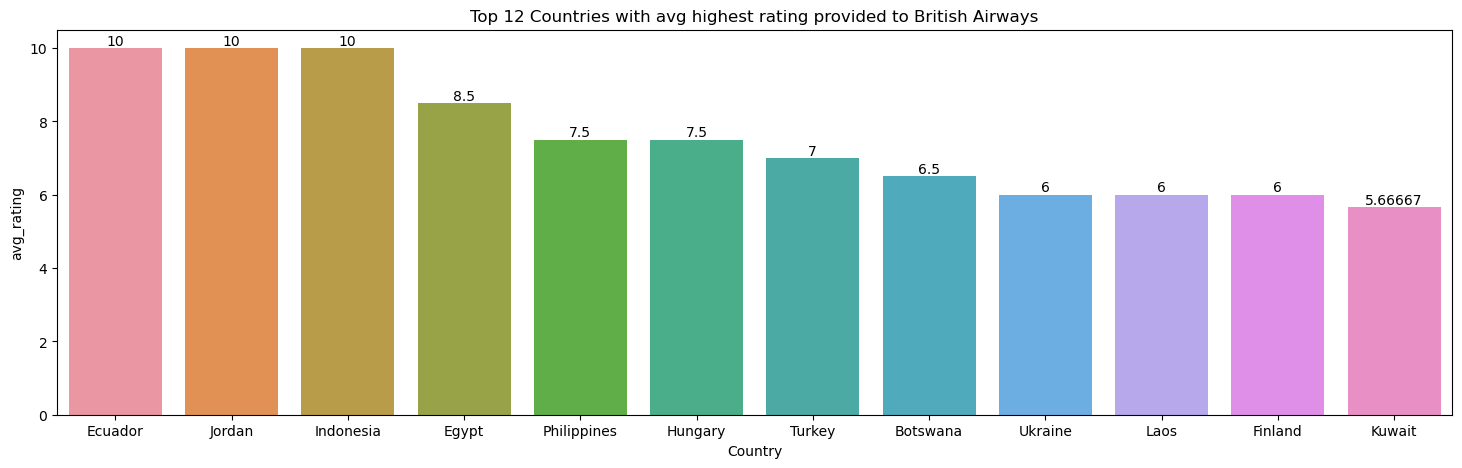

In [20]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='Country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

#### Time Series Analysis


In [21]:
df.dtypes

Reviews             object
Stars              float64
Date                object
Country             object
Verified              bool
Cleaned_reviews     object
dtype: object

In [22]:
df.Date = pd.to_datetime(df.Date)

In [23]:
fig = px.line(df,x='Date',y="Stars")
fig.update_xaxes(rangeslider_visible = True)
fig.show()

c:\Users\nikhi\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


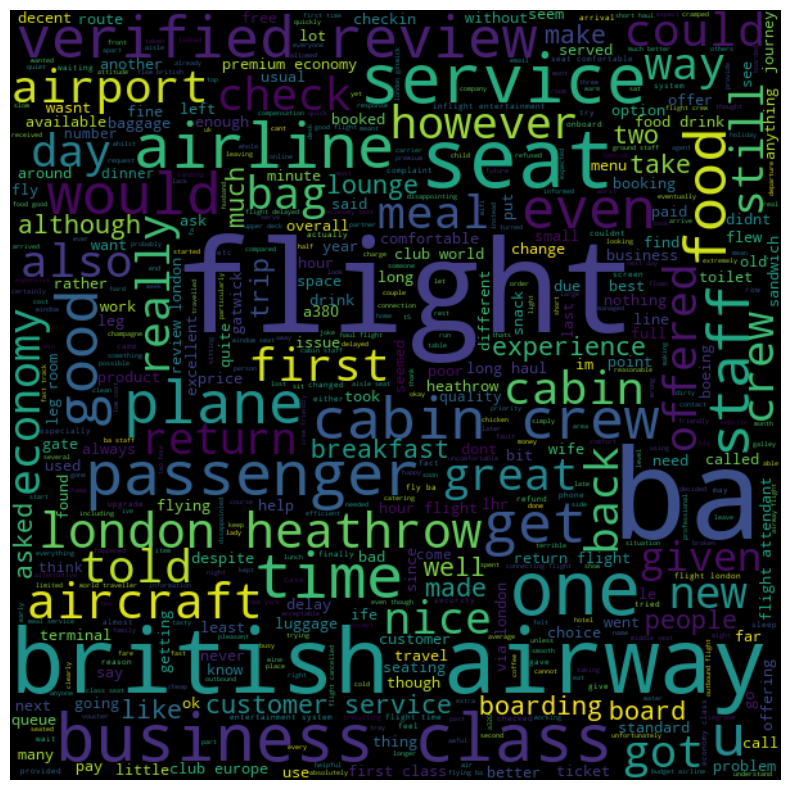

In [24]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.Cleaned_reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words like "passenger,British airway,ba..." are not seting any idea whether the review is positive or negative.So we will include this words into stopwords and redraw the wordcloud

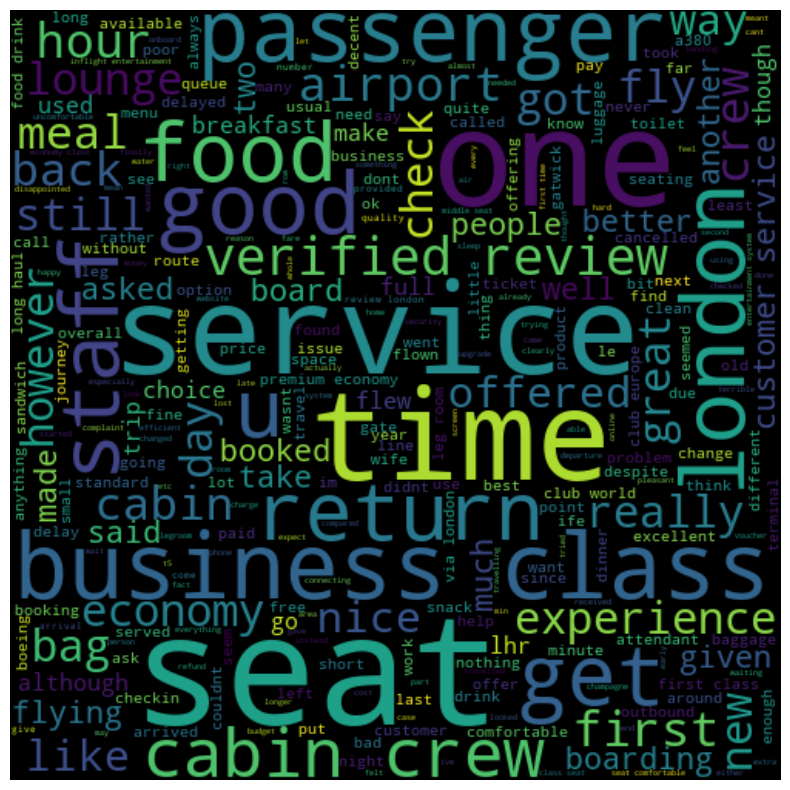

In [26]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.Cleaned_reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Frequency

In [27]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'drink'),
  Text(13, 0, 'meal'),
  Text(14, 0, 'lounge'),
  Text(15, 0, 'return'),
  Text(16, 0, 'club'),
  Text(17, 0, 'boarding'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'experience')])

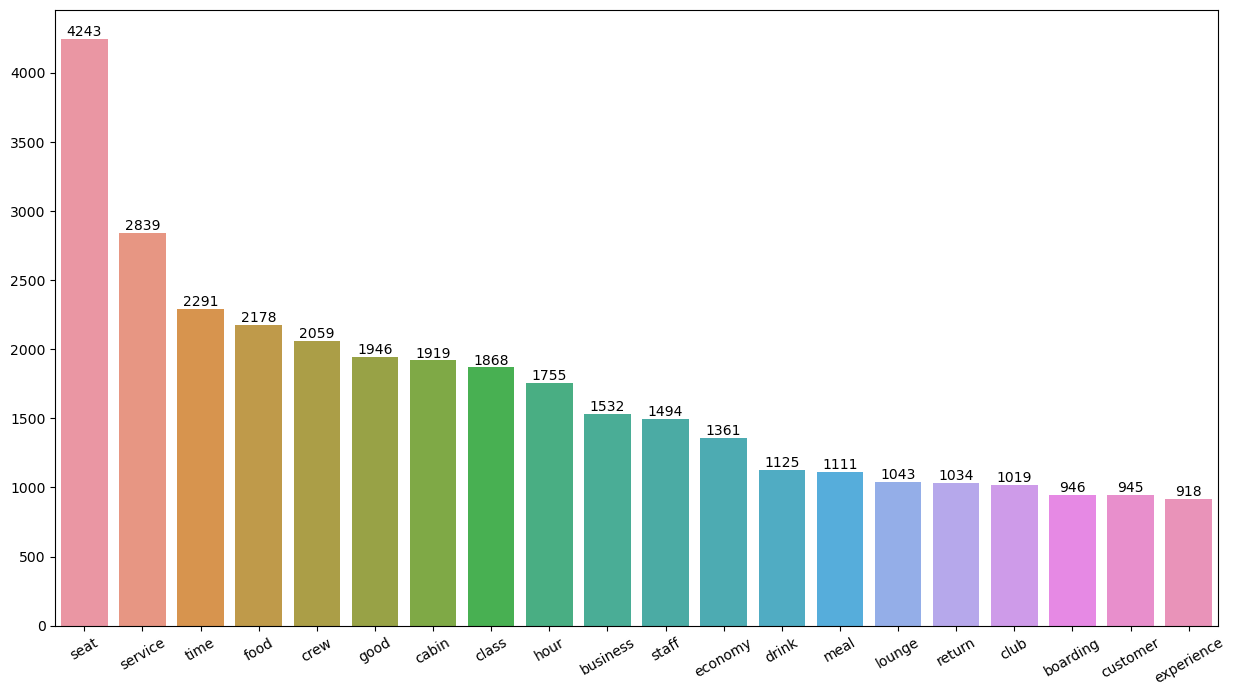

In [28]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "time" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

#### Word Frequency with N-gram

<Axes: >

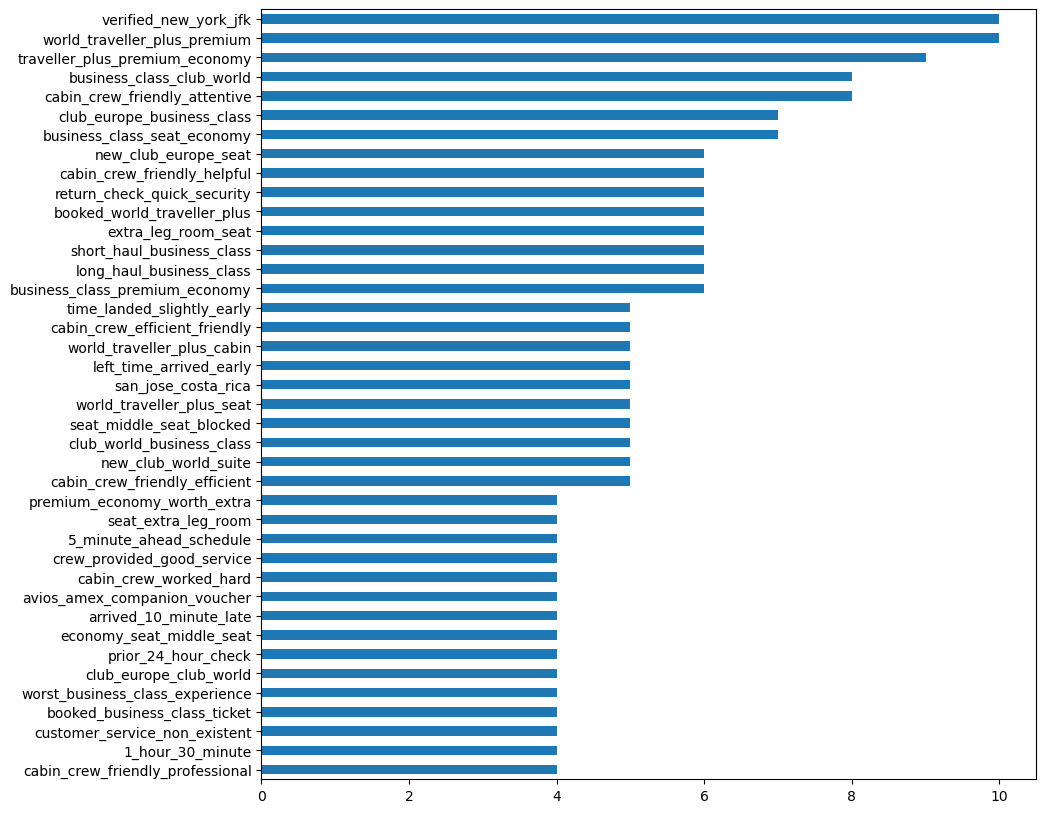

In [29]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [31]:
ratings_1_3 = df[df.Stars.isin([1,2,3])]
ratings_4_6 = df[df.Stars.isin([4,5,6])]
ratings_7_10 = df[df.Stars.isin([7,8,9,10])]

<Axes: >

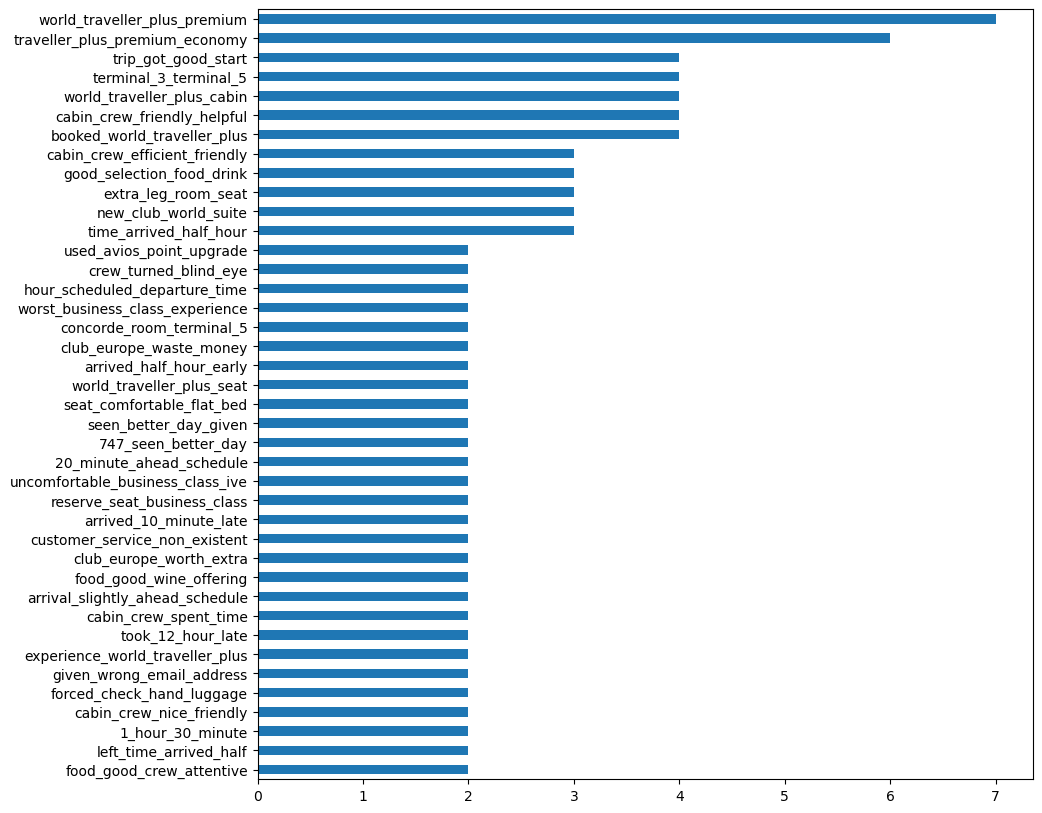

In [32]:
reviews_1_3 = " ".join(ratings_1_3.Cleaned_reviews)
reviews_4_6 = " ".join(ratings_4_6.Cleaned_reviews)
reviews_7_10 = " ".join(ratings_7_10.Cleaned_reviews)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

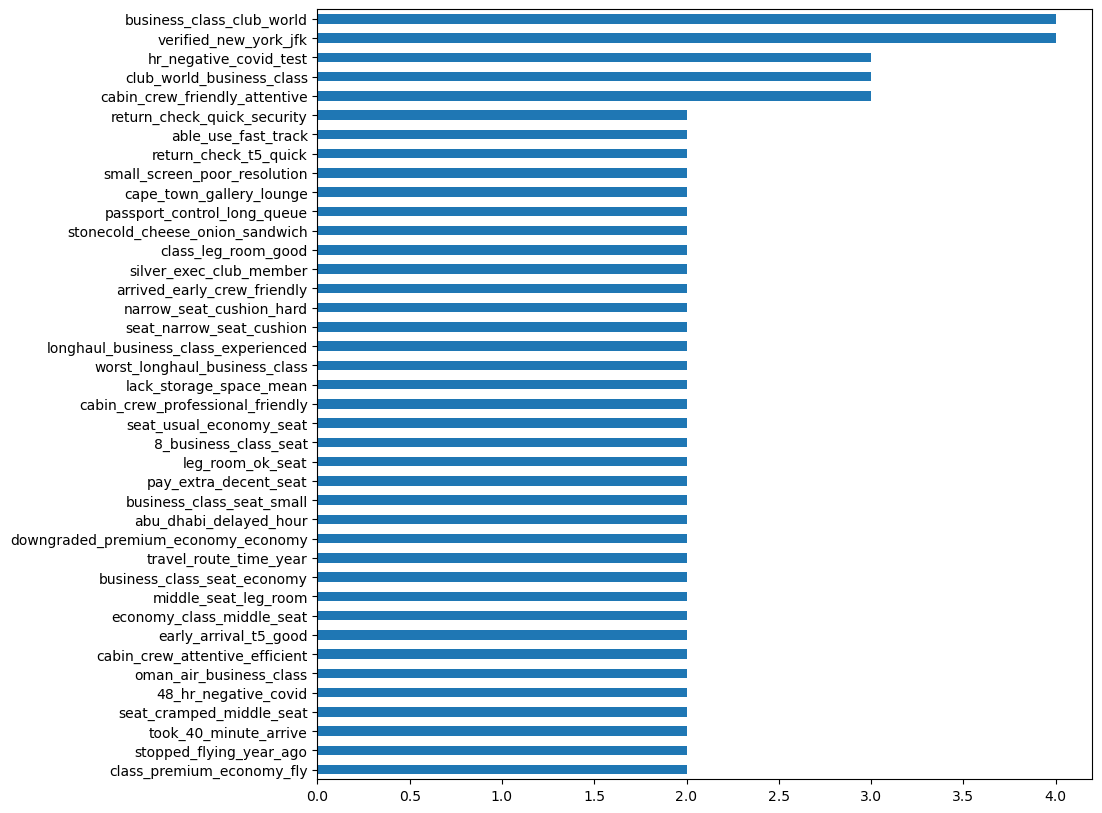

In [33]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

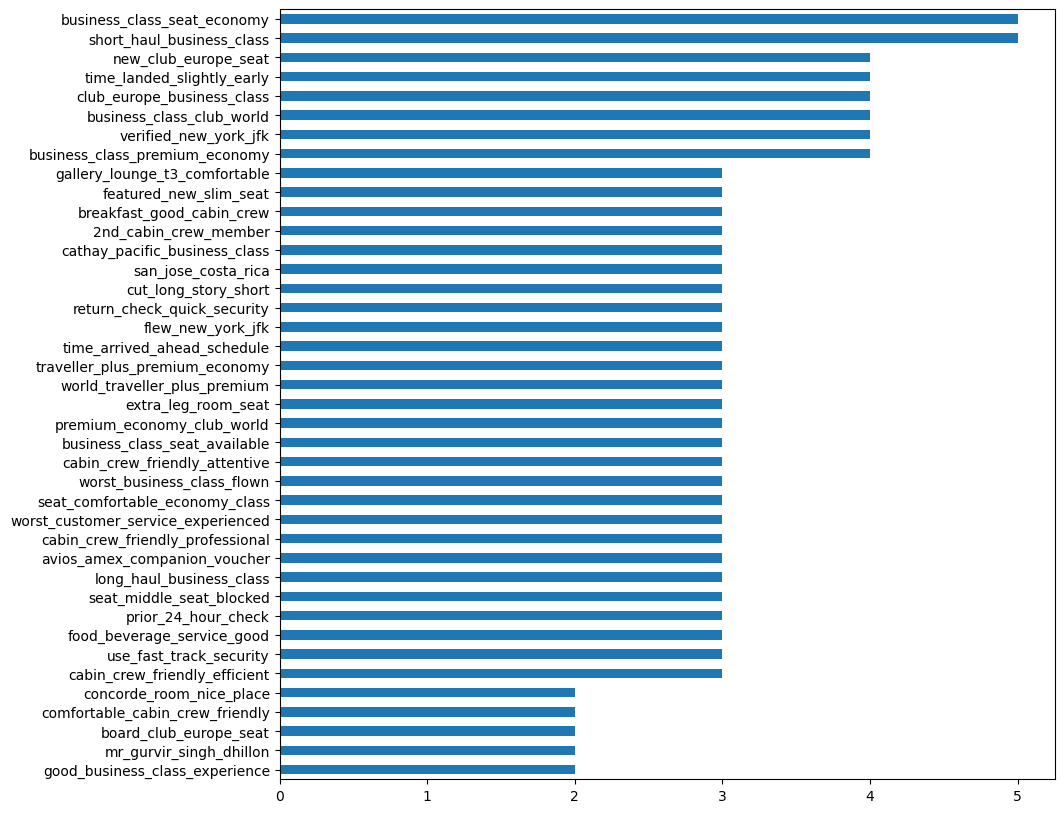

In [34]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [36]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.Cleaned_reviews)):
    sent= TextBlob(df.Cleaned_reviews[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [37]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2367 number of reviews between -0.2 and 0.2 polarity score
1377 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2367 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [38]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.Cleaned_reviews)):
    
    score = vds.polarity_scores(df.Cleaned_reviews[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [39]:
df.label.value_counts()

label
 1    2159
-1    1203
 0     133
Name: count, dtype: int64

#### Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [43]:

%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.Cleaned_reviews).toarray()
tf_feature_names = vect.get_feature_names_out()

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [45]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,792.4,flight,2914.0,flight,2147.9,british,22.4,seat,42.1,lounge,535.7,seat,2058.4,flight,258.9
1,time,376.3,ba,1617.1,seat,1234.1,airway,22.0,first,30.4,first,460.8,ba,1326.3,good,146.3
2,boarding,349.6,hour,884.0,crew,1156.6,flight,16.0,choice,28.2,good,413.8,class,1144.3,ba,135.3
3,bag,281.8,service,771.0,cabin,1085.5,lhr,15.6,main,23.8,ba,391.7,business,1037.0,lounge,127.2
4,gate,280.1,customer,737.8,food,1017.3,1st,9.6,class,20.2,seat,367.4,flight,917.2,seat,124.9
5,minute,277.7,airway,725.2,ba,968.8,infant,9.1,starter,15.7,class,342.6,airline,888.7,boarding,84.9
6,check,264.6,british,723.6,good,957.2,baby,8.9,chicken,15.5,flight,335.1,economy,800.7,return,75.8
7,plane,260.6,london,668.6,service,908.4,geneva,8.5,cabin,15.4,food,320.5,british,725.6,service,75.6
8,crew,240.3,would,663.5,time,706.2,wt,8.3,breakfast,15.1,crew,318.0,airway,721.7,club,71.2
9,heathrow,239.9,time,660.2,london,621.1,nappy,8.1,meal,14.7,club,308.7,service,643.4,drink,70.6


In [46]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.03510874, 0.08004192],
       [0.02150375, 0.05965531],
       [0.09397402, 0.11047253],
       ...,
       [0.01418133, 0.1454858 ],
       [0.00993252, 0.25240293],
       [0.0836949 , 0.07201723]])

In [47]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [48]:
df_topic


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,39.9,seat,15.3
1,ba,12.8,ba,8.6
2,hour,9.1,class,6.9
3,time,7.4,business,5.4
4,airway,7.3,food,5.4
5,london,7.2,service,5.3
6,british,7.2,cabin,5.1
7,service,6.6,good,5.0
8,would,5.9,crew,4.8
9,airline,5.2,economy,4.2
